In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin

# Import the data
data = pd.read_csv('/data.csv')
data = data.drop(columns=['Unnamed: 32'])  # Drop the last column

# Preprocessing
scaler = StandardScaler()
X = data[['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']]
y = data['diagnosis'].map({'M': 1, 'B': 0})

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

# Define the deep learning model
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Create an instance of the model
model = Net(X_train.shape[1])

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training
num_epochs = 100
batch_size = 16
num_batches = len(X_train) // batch_size

for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(num_batches):
        # Generate batch
        batch_indices = torch.randperm(len(X_train))[:batch_size]
        batch_X = X_train[batch_indices]
        batch_y = y_train[batch_indices]

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs.squeeze(), batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / num_batches}")

# Evaluation
with torch.no_grad():
    predictions = model(X_test)
    predictions = torch.round(predictions).squeeze()
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy * 100}%")




Epoch 1/100, Loss: 0.38195509037801195
Epoch 2/100, Loss: 0.33170925958880354
Epoch 3/100, Loss: 0.3704212355826582
Epoch 4/100, Loss: 0.32056778403265135
Epoch 5/100, Loss: 0.3372358963159578
Epoch 6/100, Loss: 0.30231287410216673
Epoch 7/100, Loss: 0.3548755310475826
Epoch 8/100, Loss: 0.27695904499185936
Epoch 9/100, Loss: 0.32355242701513426
Epoch 10/100, Loss: 0.23162953781762294
Epoch 11/100, Loss: 0.2784877084195614
Epoch 12/100, Loss: 0.31425011583736967
Epoch 13/100, Loss: 0.2792503545060754
Epoch 14/100, Loss: 0.3258556361709322
Epoch 15/100, Loss: 0.2750837528812034
Epoch 16/100, Loss: 0.2982241221304451
Epoch 17/100, Loss: 0.3133221896631377
Epoch 18/100, Loss: 0.2954764029543315
Epoch 19/100, Loss: 0.2713804077357054
Epoch 20/100, Loss: 0.34033474060041563
Epoch 21/100, Loss: 0.33322119233863695
Epoch 22/100, Loss: 0.2917274981737137
Epoch 23/100, Loss: 0.24271964760763304
Epoch 24/100, Loss: 0.3001266071306808
Epoch 25/100, Loss: 0.25458365412695066
Epoch 26/100, Loss: 0.

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin

# Import the data
data = pd.read_csv('/data.csv')
data = data.drop(columns=['Unnamed: 32'])  # Drop the last column

# Preprocessing
scaler = StandardScaler()
X = data[['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = data['diagnosis'].map({'M': 1, 'B': 0})

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

# Define the deep learning model
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Create an instance of the model
model = Net(X_train.shape[1])

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training
num_epochs = 100
batch_size = 16
num_batches = len(X_train) // batch_size

for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(num_batches):
        # Generate batch
        batch_indices = torch.randperm(len(X_train))[:batch_size]
        batch_X = X_train[batch_indices]
        batch_y = y_train[batch_indices]

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs.squeeze(), batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / num_batches}")

# Evaluation
with torch.no_grad():
    predictions = model(X_test)
    predictions = torch.round(predictions).squeeze()
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy * 100}%")




Epoch 1/100, Loss: 0.13237052666240093
Epoch 2/100, Loss: 0.07869710172053601
Epoch 3/100, Loss: 0.16327773041224905
Epoch 4/100, Loss: 0.0460232486098643
Epoch 5/100, Loss: 0.12600912562733615
Epoch 6/100, Loss: 0.05392403676939596
Epoch 7/100, Loss: 0.14546180561436423
Epoch 8/100, Loss: 0.0892275398197983
Epoch 9/100, Loss: 0.12963454285188294
Epoch 10/100, Loss: 0.12933745579461434
Epoch 11/100, Loss: 0.15609584901747958
Epoch 12/100, Loss: 0.07327102727556069
Epoch 13/100, Loss: 0.09659222385380417
Epoch 14/100, Loss: 0.09317193925380707
Epoch 15/100, Loss: 0.06993880290870688
Epoch 16/100, Loss: 0.11733589714068719
Epoch 17/100, Loss: 0.10817687100331698
Epoch 18/100, Loss: 0.059232932228561755
Epoch 19/100, Loss: 0.10994474401897085
Epoch 20/100, Loss: 0.11813556258234062
Epoch 21/100, Loss: 0.11047529559956663
Epoch 22/100, Loss: 0.036373746832915846
Epoch 23/100, Loss: 0.11187087511539826
Epoch 24/100, Loss: 0.12391349221122384
Epoch 25/100, Loss: 0.09192312024866364
Epoch 26/

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin

# Import the data
data = pd.read_csv('/data.csv')
data = data.drop(columns=['Unnamed: 32'])  # Drop the last column

# Preprocessing
scaler = StandardScaler()
X = data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
y = data['diagnosis'].map({'M': 1, 'B': 0})

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

# Define the deep learning model
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Create an instance of the model
model = Net(X_train.shape[1])

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training
num_epochs = 100
batch_size = 16
num_batches = len(X_train) // batch_size

for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(num_batches):
        # Generate batch
        batch_indices = torch.randperm(len(X_train))[:batch_size]
        batch_X = X_train[batch_indices]
        batch_y = y_train[batch_indices]

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs.squeeze(), batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / num_batches}")

# Evaluation
with torch.no_grad():
    predictions = model(X_test)
    predictions = torch.round(predictions).squeeze()
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy * 100}%")


Epoch 1/100, Loss: 0.22324939258396626
Epoch 2/100, Loss: 0.15185475242989405
Epoch 3/100, Loss: 0.2152391006903989
Epoch 4/100, Loss: 0.1941248346120119
Epoch 5/100, Loss: 0.17507833495203937
Epoch 6/100, Loss: 0.17852890232045734
Epoch 7/100, Loss: 0.1563466704849686
Epoch 8/100, Loss: 0.1452803217938968
Epoch 9/100, Loss: 0.1425333104229399
Epoch 10/100, Loss: 0.15738149514488345
Epoch 11/100, Loss: 0.16011055738532118
Epoch 12/100, Loss: 0.14038343481453402
Epoch 13/100, Loss: 0.11584728098075305
Epoch 14/100, Loss: 0.1455184438132814
Epoch 15/100, Loss: 0.16648142618526304
Epoch 16/100, Loss: 0.15160578765374208
Epoch 17/100, Loss: 0.1624359610889639
Epoch 18/100, Loss: 0.12378555627739322
Epoch 19/100, Loss: 0.13722777055642968
Epoch 20/100, Loss: 0.14089693914034537
Epoch 21/100, Loss: 0.12558475484339787
Epoch 22/100, Loss: 0.17813142063096166
Epoch 23/100, Loss: 0.1596371761323618
Epoch 24/100, Loss: 0.11346815000953418
Epoch 25/100, Loss: 0.16984550302316034
Epoch 26/100, Los

Fold 1, Epoch 1/100, Loss: 0.3637637517281941
Fold 1, Epoch 2/100, Loss: 0.3515417804675443
Fold 1, Epoch 3/100, Loss: 0.3403441980481148
Fold 1, Epoch 4/100, Loss: 0.2967096372906651
Fold 1, Epoch 5/100, Loss: 0.2867142204195261
Fold 1, Epoch 6/100, Loss: 0.27832022069820334
Fold 1, Epoch 7/100, Loss: 0.2994073930063418
Fold 1, Epoch 8/100, Loss: 0.25316638725676704
Fold 1, Epoch 9/100, Loss: 0.3230126846049513
Fold 1, Epoch 10/100, Loss: 0.32028019215379444
Fold 1, Epoch 11/100, Loss: 0.3297099495040519
Fold 1, Epoch 12/100, Loss: 0.2611889046217714
Fold 1, Epoch 13/100, Loss: 0.28872524441352915
Epoch 00014: reducing learning rate of group 0 to 1.0000e-03.
Fold 1, Epoch 14/100, Loss: 0.28751818489815506
Fold 1, Epoch 15/100, Loss: 0.27356245714638916
Fold 1, Epoch 16/100, Loss: 0.2760511503687927
Fold 1, Epoch 17/100, Loss: 0.22309808353228228
Fold 1, Epoch 18/100, Loss: 0.21943405589887074
Fold 1, Epoch 19/100, Loss: 0.263122931388872
Fold 1, Epoch 20/100, Loss: 0.2758655423032386


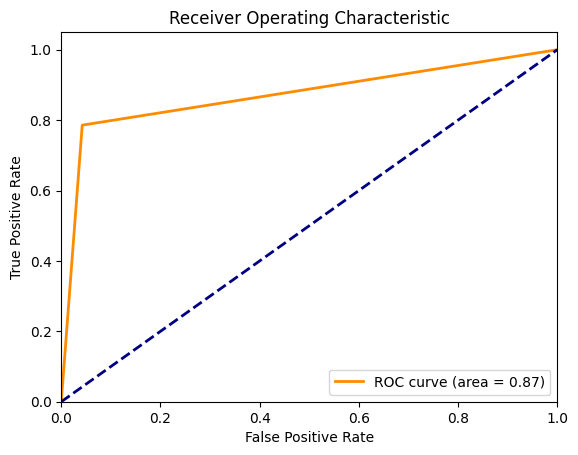

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Import the data
data = pd.read_csv('/data.csv')
data = data.drop(columns=['Unnamed: 32'])  # Drop the last column

# Preprocessing
scaler = StandardScaler()
X = data[['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']]
y = data['diagnosis'].map({'M': 1, 'B': 0})

X = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)

# Define the deep learning model
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Define the loss function
criterion = nn.BCELoss()

# Set up k-fold cross-validation
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Training and evaluation loop with k-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Create an instance of the model
    model = Net(X_train.shape[1])

    # Define the optimizer with learning rate scheduling
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, verbose=True)

    # Training
    num_epochs = 100
    batch_size = 16
    num_batches = len(X_train) // batch_size

    early_stopping_counter = 0
    best_loss = float('inf')
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i in range(num_batches):
            # Generate batch
            batch_indices = torch.randperm(len(X_train))[:batch_size]
            batch_X = X_train[batch_indices]
            batch_y = y_train[batch_indices]

            # Forward pass
            outputs = model(batch_X)
            loss = criterion(outputs.squeeze(), batch_y)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / num_batches

        # Check for early stopping
        if epoch_loss < best_loss:
            best_loss = epoch_loss
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= 10:
                print(f"Early stopping at epoch {epoch+1}.")
                break

        # Learning rate scheduling
        scheduler.step(epoch_loss)

        print(f"Fold {fold+1}, Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}")

    # Evaluation
    with torch.no_grad():
        model.eval()
        predictions = model(X_test)
        predictions = torch.round(predictions).squeeze()
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)

        print(f"Fold {fold+1} - Accuracy: {accuracy * 100}%, Precision: {precision}, Recall: {recall}, F1-score: {f1}")

# Calculate false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
     lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()